In [5]:
using Plots
using Distributions

In [510]:

mutable struct haplotype
    values::AbstractVector{Float64}
    breaks::AbstractVector{Float64} # start at zero and increase
end 


mutable struct chromosome
    x1::haplotype
    x2::haplotype
    r::Float64
end 



function compress_haplotype(h)
    n = length(h.values)

    
    breaks = [h.breaks[1]]
    values = [h.values[1]]
    
    for i in 2:(n-1)
        v1 = h.values[i]
        v0 = h.values[i-1]
        if v1 != v0
            breaks = vcat(breaks, h.breaks[i])
            values = vcat(values, h.values[i])
        end 
    end 
    
    breaks = vcat(breaks, h.breaks[n])
    values = vcat(values, h.values[n])
    return haplotype(values, breaks)
end 



function recombine(chromosome)
    d = Distributions.Poisson(chromosome.r)
    n = rand(d,1)
    if n[1] == 0
        n[1] = 1
    end
    new_b = sort(vcat([0],rand(n[1]),[1]))
    new_values = []
    new_breaks = []

    for i in 2:(n[1]+2)

        if mod(i,2) == 1
            
            b = new_b[i]
#             print(b)
#             print(" ")
            b_0 = new_b[i-1]
            inds = ((chromosome.x1.breaks .< b).+(b_0 .<= chromosome.x1.breaks)) .> 1
            inds_1 = argmax(chromosome.x2.breaks[chromosome.x2.breaks .< b])
            new_values = vcat(new_values,chromosome.x1.values[inds],[chromosome.x2.values[inds_1]] )
            new_breaks = vcat(new_breaks,chromosome.x1.breaks[inds],[b] )
      
        else 
            b = new_b[i]
#             print(b)
#             print(" ")
            b_0 = new_b[i-1]
            inds = ((chromosome.x2.breaks .< b).+(b_0 .<= chromosome.x2.breaks)) .> 1
            inds_1 = argmax(chromosome.x1.breaks[chromosome.x1.breaks .< b])
            new_values = vcat(new_values,chromosome.x2.values[inds],[chromosome.x1.values[inds_1]] )
            new_breaks = vcat(new_breaks,chromosome.x2.breaks[inds],[b] )
  
        end
    end 
    
    x = haplotype(new_values,new_breaks)
    x = compress_haplotype(x)
    return x
end



recombine (generic function with 1 method)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

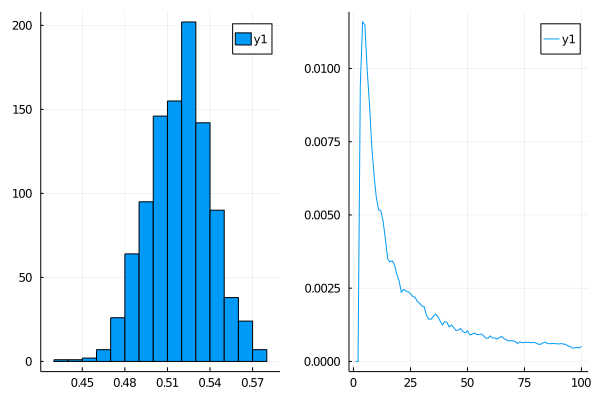

In [544]:
v = []
r = 5
N = 1000
T = 100

h1 = haplotype([1.0,0],[0,0.5])
h2 = haplotype([0.0,1],[0,0.5])
C_ls = vcat(repeat([chromosome(h1,h1,N/2)],r),repeat([chromosome(h2,h2,N/2)],r))
var_ls = zeros(T)

for i in 1:T
    print(i)
    print(" ")
    C_ls_new = []
    for j in 1:N
        pair = sample(C_ls,2)
        h1 = recombine(pair[1])
        h2 = recombine(pair[2])
        C = chromosome(h1,h2,r)
        C_ls_new = vcat(C_ls_new, C)
    end
    var_ls[i] = var(breading_value.(C_ls))
    C_ls = C_ls_new
end


v = breading_value.(C_ls)


p1 = Plots.histogram(v)
p2 = Plots.plot(var_ls)
plot(p1,p2)

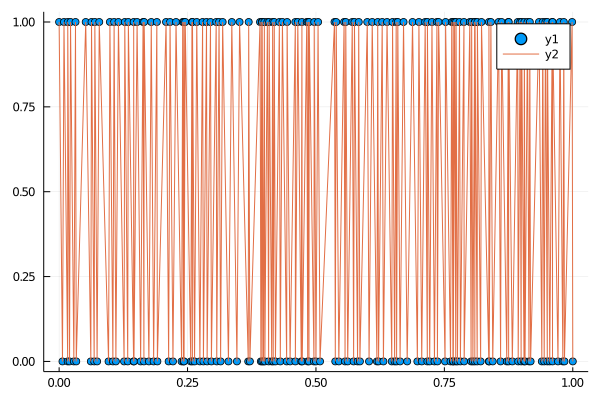

In [545]:
n = 5
Plots.scatter(C_ls[n].x1.breaks,C_ls[n].x1.values)
Plots.plot!(C_ls[n].x1.breaks,C_ls[n].x1.values)

In [493]:
h = C_ls[n].x1
h = compress_haplotype(h)

haplotype([0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0], [0.2855400940116213, 0.3224157049391292, 0.4244756678143333, 0.5, 0.5721149664444323, 0.5876773852909207, 0.7372434522897164, 0.9705731405428661, 1.0])

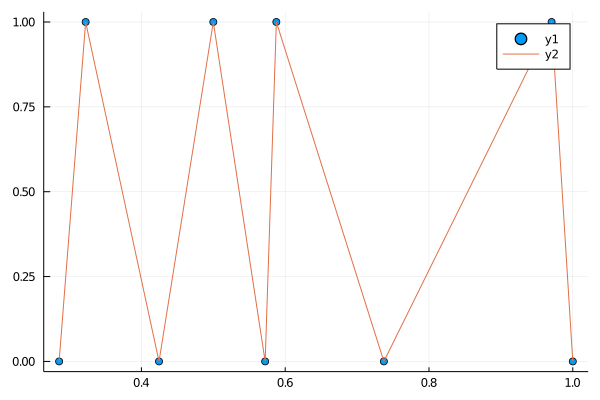

In [494]:
Plots.scatter(h.breaks,h.values)
Plots.plot!(h.breaks,h.values)

In [268]:
function breading_value(C)
    v = 0
    for i in 2:(length(C.x1.breaks)+1)
        b0 = C.x1.breaks[i-1]
        b1 = vcat(C.x1.breaks,[1])[i]
        l = b1 - b0
        v +=  l*C.x1.values[i-1]/2
    end 
    for i in 2:(length(C.x2.breaks)+1)
        b0 = C.x2.breaks[i-1]
        b1 = vcat(C.x2.breaks,[1])[i]
        l = b1 - b0
        v +=  l*C.x2.values[i-1]/2
    end 
    return v
end

breading_value (generic function with 1 method)

In [272]:
breading_value(C)

0.4373648653982102

0.02262116924453239 0.17390560321088722 0.3615290578038539 0.6164031104081211 0.9898332816370359 1.0 

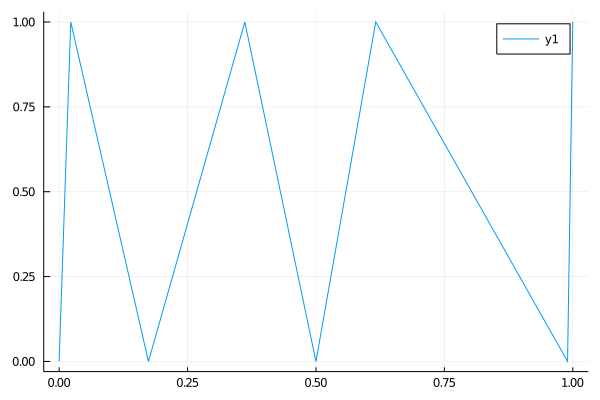

In [466]:
h1 = haplotype([1.0,0],[0,0.5])
h2 = haplotype([0.0,1],[0,0.5])
C = chromosome(h1,h2,3)
h = recombine(C)
Plots.plot(h.breaks,h.values)